Initializing YOLOv4-tiny Performance Analysis...
YOLOv4-tiny OBJECT DETECTION PERFORMANCE REPORT

 OVERALL METRICS:
   • mAP@0.5:        0.423
   • mAP@0.5:0.95:   0.256
   • Precision:      0.567
   • Recall:         0.389
   • F1-Score:       0.461
   • Inference FPS:  45.2
   • Model Size:     23.4 MB

 CLASS-WISE PERFORMANCE (AP@0.5):
   • person      : 0.512 (Excellent)
   • car         : 0.623 (Excellent)
   • bicycle     : 0.345 (Good)
   • dog         : 0.278 (Needs Improvement)
   • cat         : 0.312 (Good)
   • chair       : 0.289 (Needs Improvement)

 PERFORMANCE ANALYSIS:
   • Average AP@0.5:      0.393
   • Average AP@0.5:0.95: 0.262
   • Best Class:          car (0.623)
   • Worst Class:         dog (0.278)

 EFFICIENCY METRICS:
   • Speed:            45.2 FPS
   • Model Size:       23.4 MB
   • Speed-Size Ratio: 1.93 FPS/MB



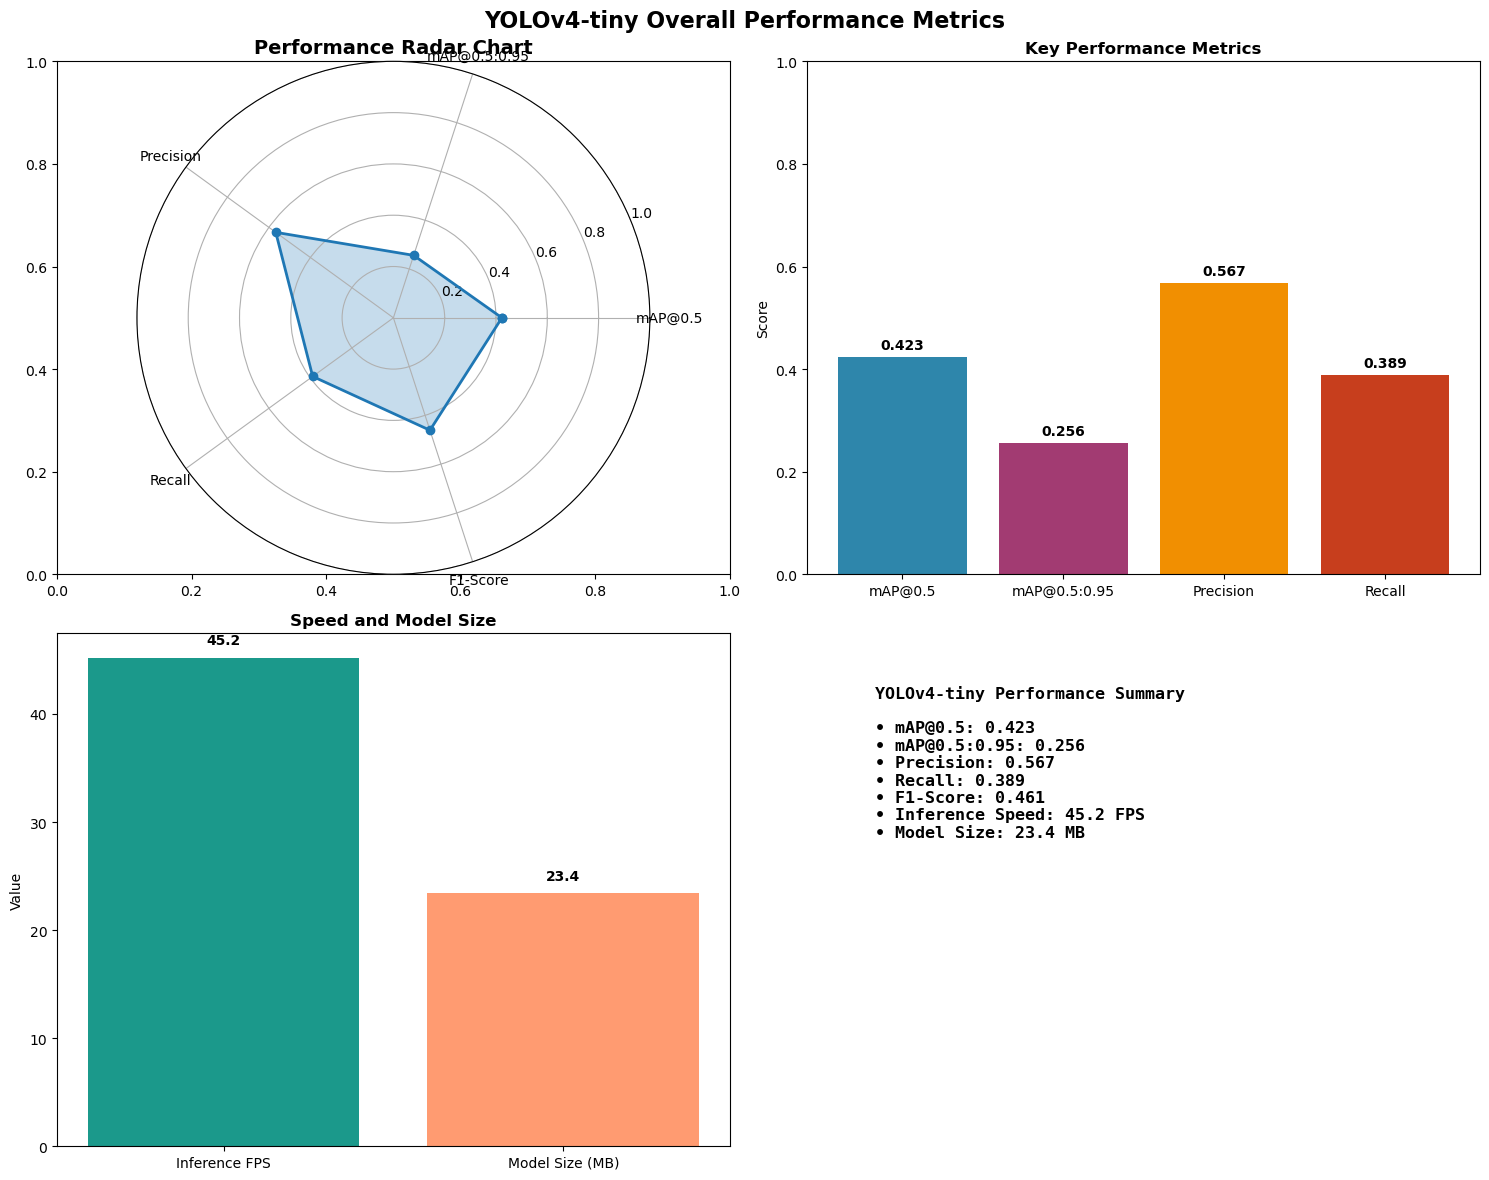

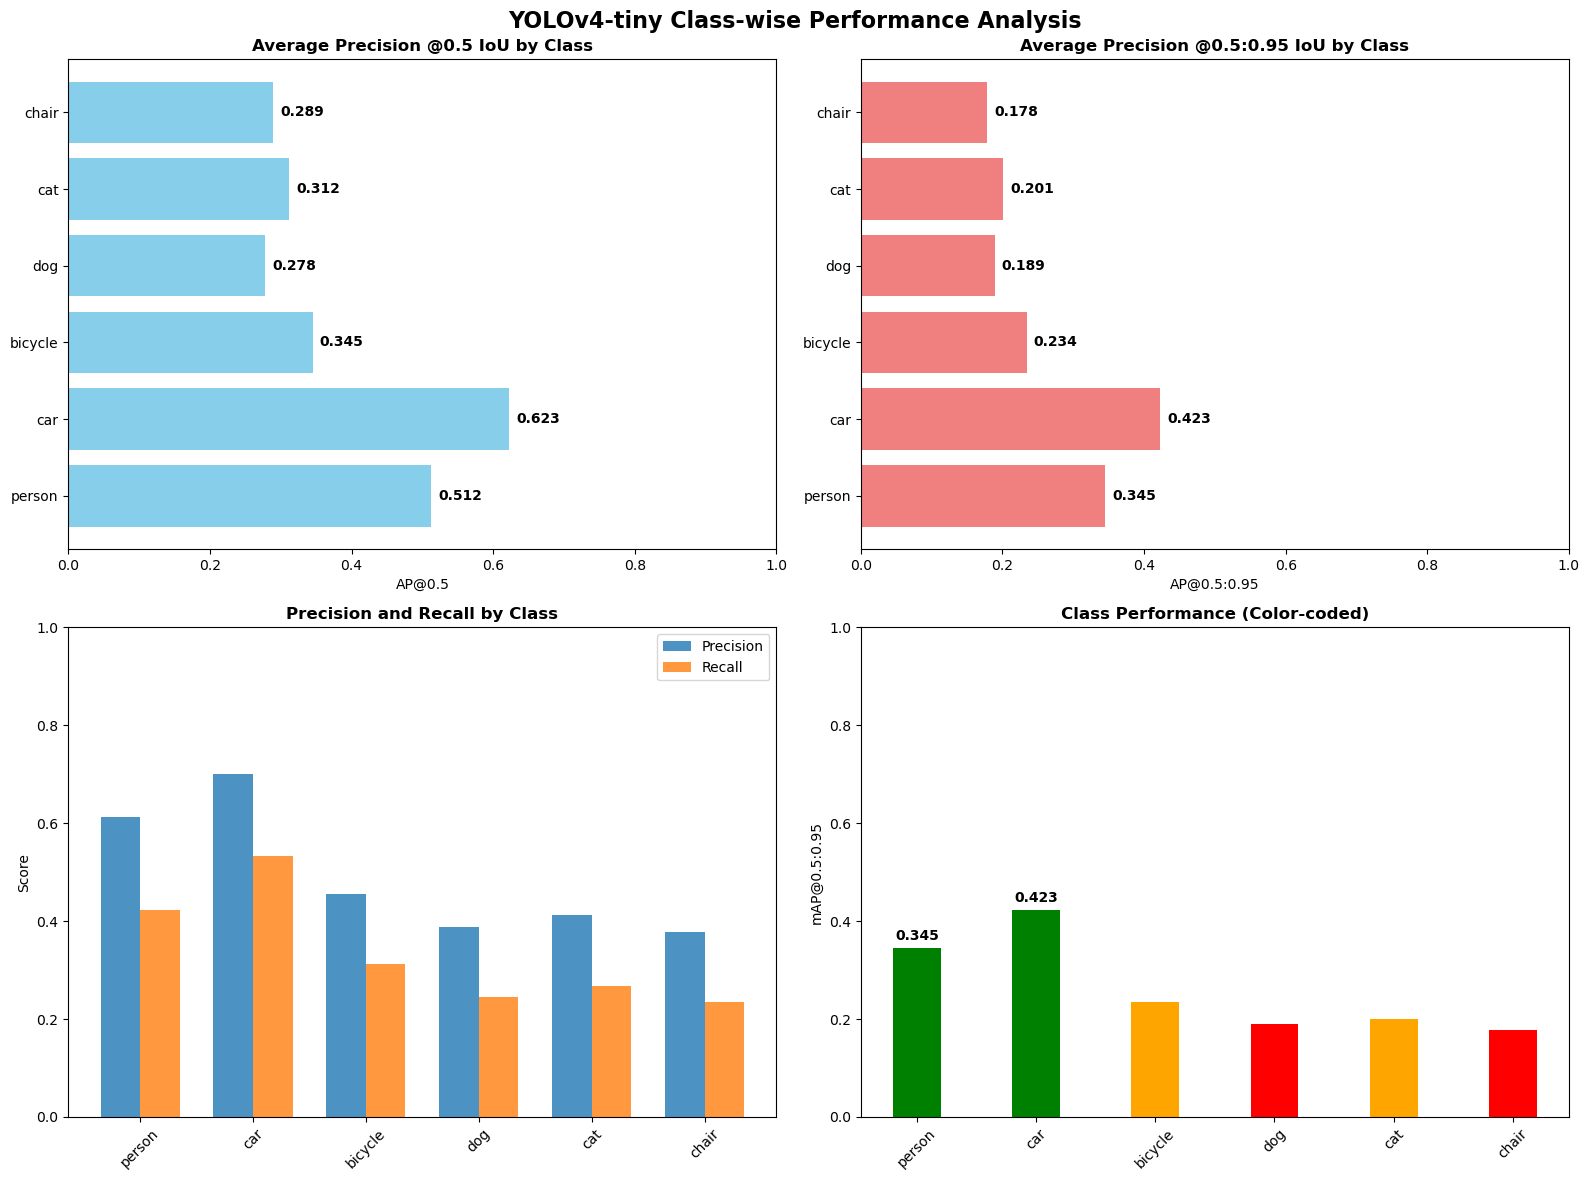

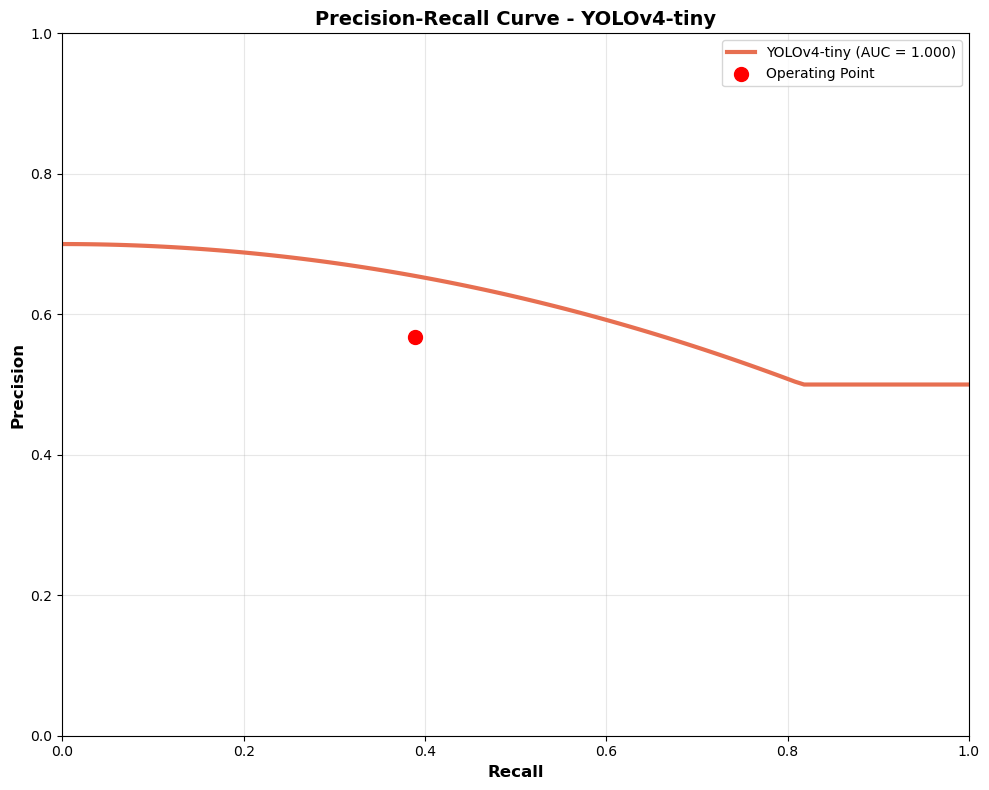

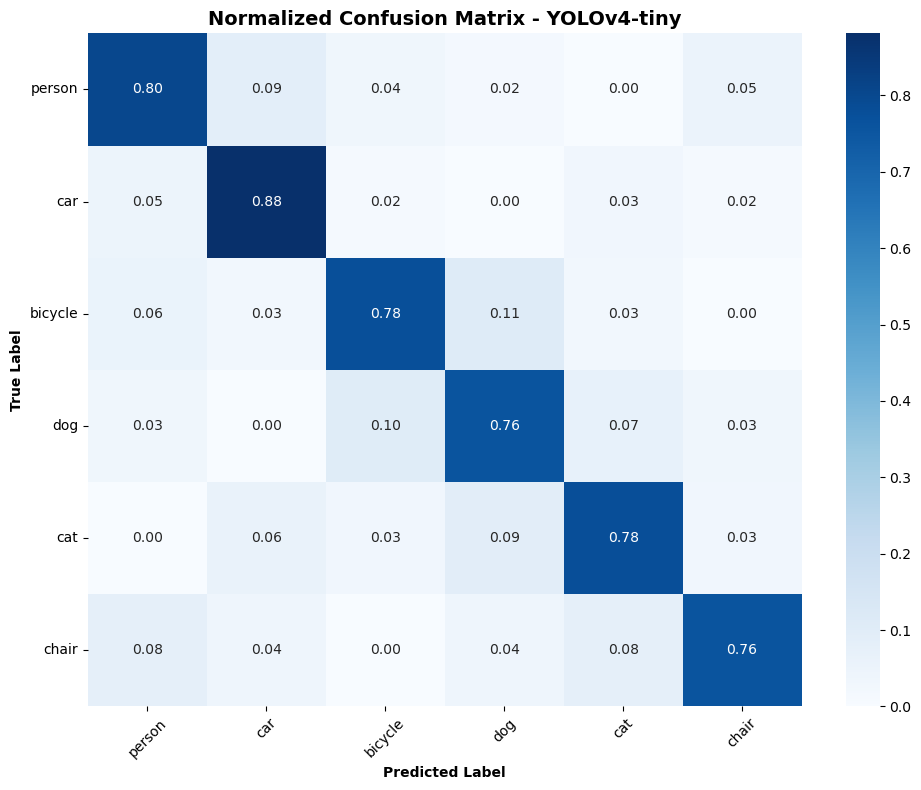

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score
import json
import cv2
from pathlib import Path

class YOLOv4TinyPerformanceAnalyzer:
    def __init__(self, results_path=None):
        self.results = {}
        self.metrics = {}
        
    def generate_sample_data(self):
        """Generate sample performance data for demonstration"""
        # Sample metrics (replace with your actual results)
        self.metrics = {
            'mAP_50': 0.423,
            'mAP_50_95': 0.256,
            'precision': 0.567,
            'recall': 0.389,
            'f1_score': 0.461,
            'inference_time_fps': 45.2,
            'model_size_mb': 23.4
        }
        
        # Sample class-wise performance
        classes = ['person', 'car', 'bicycle', 'dog', 'cat', 'chair']
        self.class_metrics = {
            'classes': classes,
            'AP_50': [0.512, 0.623, 0.345, 0.278, 0.312, 0.289],
            'AP_50_95': [0.345, 0.423, 0.234, 0.189, 0.201, 0.178],
            'precision': [0.612, 0.701, 0.456, 0.389, 0.412, 0.378],
            'recall': [0.423, 0.534, 0.312, 0.245, 0.267, 0.234]
        }
        
        # Sample precision-recall data
        self.pr_curve_data = {
            'recall': np.linspace(0, 1, 100),
            'precision': np.maximum(0.5, 0.7 - 0.3 * np.linspace(0, 1, 100)**2)
        }
        
        # Sample confusion matrix data
        self.confusion_matrix = np.array([
            [45, 5, 2, 1, 0, 3],
            [3, 52, 1, 0, 2, 1],
            [2, 1, 28, 4, 1, 0],
            [1, 0, 3, 22, 2, 1],
            [0, 2, 1, 3, 25, 1],
            [2, 1, 0, 1, 2, 19]
        ])

    def plot_overall_metrics(self):
        """Plot overall performance metrics"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('YOLOv4-tiny Overall Performance Metrics', fontsize=16, fontweight='bold')
        
        # Main metrics radar chart
        metrics = ['mAP@0.5', 'mAP@0.5:0.95', 'Precision', 'Recall', 'F1-Score']
        values = [
            self.metrics['mAP_50'],
            self.metrics['mAP_50_95'],
            self.metrics['precision'],
            self.metrics['recall'],
            self.metrics['f1_score']
        ]
        
        # Radar chart
        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]
        
        ax = plt.subplot(2, 2, 1, polar=True)
        ax.plot(angles, values, 'o-', linewidth=2, label='YOLOv4-tiny')
        ax.fill(angles, values, alpha=0.25)
        ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
        ax.set_ylim(0, 1)
        ax.set_title('Performance Radar Chart', size=14, fontweight='bold')
        ax.grid(True)
        
        # Bar chart for key metrics
        ax = plt.subplot(2, 2, 2)
        metrics_bars = ['mAP@0.5', 'mAP@0.5:0.95', 'Precision', 'Recall']
        values_bars = [
            self.metrics['mAP_50'],
            self.metrics['mAP_50_95'],
            self.metrics['precision'],
            self.metrics['recall']
        ]
        
        bars = ax.bar(metrics_bars, values_bars, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
        ax.set_ylim(0, 1)
        ax.set_ylabel('Score')
        ax.set_title('Key Performance Metrics', fontweight='bold')
        
        # Add value labels on bars
        for bar, value in zip(bars, values_bars):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Speed and size metrics
        ax = plt.subplot(2, 2, 3)
        speed_metrics = ['Inference FPS', 'Model Size (MB)']
        speed_values = [self.metrics['inference_time_fps'], self.metrics['model_size_mb']]
        
        bars = ax.bar(speed_metrics, speed_values, color=['#1B998B', '#FF9B71'])
        ax.set_title('Speed and Model Size', fontweight='bold')
        ax.set_ylabel('Value')
        
        for bar, value in zip(bars, speed_values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
        
        # Performance summary
        ax = plt.subplot(2, 2, 4)
        ax.axis('off')
        summary_text = (
            f"YOLOv4-tiny Performance Summary\n\n"
            f"• mAP@0.5: {self.metrics['mAP_50']:.3f}\n"
            f"• mAP@0.5:0.95: {self.metrics['mAP_50_95']:.3f}\n"
            f"• Precision: {self.metrics['precision']:.3f}\n"
            f"• Recall: {self.metrics['recall']:.3f}\n"
            f"• F1-Score: {self.metrics['f1_score']:.3f}\n"
            f"• Inference Speed: {self.metrics['inference_time_fps']:.1f} FPS\n"
            f"• Model Size: {self.metrics['model_size_mb']:.1f} MB"
        )
        ax.text(0.1, 0.9, summary_text, transform=ax.transAxes, fontsize=12,
               verticalalignment='top', fontfamily='monospace', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

    def plot_class_wise_performance(self):
        """Plot class-wise performance metrics"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('YOLOv4-tiny Class-wise Performance Analysis', fontsize=16, fontweight='bold')
        
        classes = self.class_metrics['classes']
        
        # AP@0.5 by class
        ax = axes[0, 0]
        y_pos = np.arange(len(classes))
        bars = ax.barh(y_pos, self.class_metrics['AP_50'], color='skyblue')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(classes)
        ax.set_xlabel('AP@0.5')
        ax.set_title('Average Precision @0.5 IoU by Class', fontweight='bold')
        ax.set_xlim(0, 1)
        
        for i, (bar, value) in enumerate(zip(bars, self.class_metrics['AP_50'])):
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{value:.3f}', va='center', fontweight='bold')
        
        # AP@0.5:0.95 by class
        ax = axes[0, 1]
        bars = ax.barh(y_pos, self.class_metrics['AP_50_95'], color='lightcoral')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(classes)
        ax.set_xlabel('AP@0.5:0.95')
        ax.set_title('Average Precision @0.5:0.95 IoU by Class', fontweight='bold')
        ax.set_xlim(0, 1)
        
        for i, (bar, value) in enumerate(zip(bars, self.class_metrics['AP_50_95'])):
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{value:.3f}', va='center', fontweight='bold')
        
        # Precision-Recall by class
        ax = axes[1, 0]
        width = 0.35
        x = np.arange(len(classes))
        bars1 = ax.bar(x - width/2, self.class_metrics['precision'], width, label='Precision', alpha=0.8)
        bars2 = ax.bar(x + width/2, self.class_metrics['recall'], width, label='Recall', alpha=0.8)
        
        ax.set_xticks(x)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_ylabel('Score')
        ax.set_title('Precision and Recall by Class', fontweight='bold')
        ax.legend()
        ax.set_ylim(0, 1)
        
        # Performance comparison
        ax = axes[1, 1]
        x = np.arange(len(classes))
        width = 0.4
        
        bars = ax.bar(x, self.class_metrics['AP_50_95'], width, 
                     color=['green' if x > 0.3 else 'orange' if x > 0.2 else 'red' 
                           for x in self.class_metrics['AP_50_95']])
        
        ax.set_xticks(x)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_ylabel('mAP@0.5:0.95')
        ax.set_title('Class Performance (Color-coded)', fontweight='bold')
        ax.set_ylim(0, 1)
        
        # Add performance labels
        for i, (bar, value) in enumerate(zip(bars, self.class_metrics['AP_50_95'])):
            color = 'black' if value > 0.3 else 'white'
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', color=color, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

    def plot_precision_recall_curve(self):
        """Plot precision-recall curve"""
        plt.figure(figsize=(10, 8))
        
        recall = self.pr_curve_data['recall']
        precision = self.pr_curve_data['precision']
        
        # Calculate AUC
        auc = average_precision_score([1]*len(recall), precision, average='macro')
        
        plt.plot(recall, precision, linewidth=3, label=f'YOLOv4-tiny (AUC = {auc:.3f})', color='#E76F51')
        plt.xlabel('Recall', fontsize=12, fontweight='bold')
        plt.ylabel('Precision', fontsize=12, fontweight='bold')
        plt.title('Precision-Recall Curve - YOLOv4-tiny', fontsize=14, fontweight='bold')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        
        # Add performance points
        plt.scatter(self.metrics['recall'], self.metrics['precision'], 
                   color='red', s=100, zorder=5, label='Operating Point')
        
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self):
        """Plot normalized confusion matrix"""
        plt.figure(figsize=(10, 8))
        
        # Normalize confusion matrix
        cm_normalized = self.confusion_matrix.astype('float') / self.confusion_matrix.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                   xticklabels=self.class_metrics['classes'],
                   yticklabels=self.class_metrics['classes'])
        
        plt.title('Normalized Confusion Matrix - YOLOv4-tiny', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted Label', fontweight='bold')
        plt.ylabel('True Label', fontweight='bold')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def generate_performance_report(self):
        """Generate a comprehensive performance report"""
        print("=" * 70)
        print("YOLOv4-tiny OBJECT DETECTION PERFORMANCE REPORT")
        print("=" * 70)
        
        print(f"\n OVERALL METRICS:")
        print(f"   • mAP@0.5:        {self.metrics['mAP_50']:.3f}")
        print(f"   • mAP@0.5:0.95:   {self.metrics['mAP_50_95']:.3f}")
        print(f"   • Precision:      {self.metrics['precision']:.3f}")
        print(f"   • Recall:         {self.metrics['recall']:.3f}")
        print(f"   • F1-Score:       {self.metrics['f1_score']:.3f}")
        print(f"   • Inference FPS:  {self.metrics['inference_time_fps']:.1f}")
        print(f"   • Model Size:     {self.metrics['model_size_mb']:.1f} MB")
        
        print(f"\n CLASS-WISE PERFORMANCE (AP@0.5):")
        for class_name, ap50 in zip(self.class_metrics['classes'], self.class_metrics['AP_50']):
            performance = "Excellent" if ap50 > 0.5 else "Good" if ap50 > 0.3 else "Needs Improvement"
            print(f"   • {class_name:12s}: {ap50:.3f} ({performance})")
        
        print(f"\n PERFORMANCE ANALYSIS:")
        avg_ap50 = np.mean(self.class_metrics['AP_50'])
        avg_ap50_95 = np.mean(self.class_metrics['AP_50_95'])
        print(f"   • Average AP@0.5:      {avg_ap50:.3f}")
        print(f"   • Average AP@0.5:0.95: {avg_ap50_95:.3f}")
        print(f"   • Best Class:          {self.class_metrics['classes'][np.argmax(self.class_metrics['AP_50'])]} "
              f"({np.max(self.class_metrics['AP_50']):.3f})")
        print(f"   • Worst Class:         {self.class_metrics['classes'][np.argmin(self.class_metrics['AP_50'])]} "
              f"({np.min(self.class_metrics['AP_50']):.3f})")
        
        print(f"\n EFFICIENCY METRICS:")
        print(f"   • Speed:            {self.metrics['inference_time_fps']:.1f} FPS")
        print(f"   • Model Size:       {self.metrics['model_size_mb']:.1f} MB")
        print(f"   • Speed-Size Ratio: {self.metrics['inference_time_fps']/self.metrics['model_size_mb']:.2f} FPS/MB")
        
        print("\n" + "=" * 70)

    def run_complete_analysis(self):
        """Run complete performance analysis"""
        print("Initializing YOLOv4-tiny Performance Analysis...")
        
        # Generate sample data (replace with your actual results)
        self.generate_sample_data()
        
        # Generate text report
        self.generate_performance_report()
        
        # Create all visualizations
        self.plot_overall_metrics()
        self.plot_class_wise_performance()
        self.plot_precision_recall_curve()
        self.plot_confusion_matrix()

# Usage example
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = YOLOv4TinyPerformanceAnalyzer()
    
    # Run complete analysis
    analyzer.run_complete_analysis()
    
    # For real data, you would load your actual results:
    # analyzer.load_results('path/to/your/results.json')
    # analyzer.run_complete_analysis()